In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

FIGSIZE=(20,10)
SEED=17

In [2]:
train = pd.read_csv('../data/data_improved/train_drop_variable_renamed.csv')
test = pd.read_csv('../data/data_improved/test_drop_variable_renamed.csv')

### Distinction on categorical and numerical

In [3]:
cols_use = [x for x in train.columns if x not in ['Id', 'Energy_consumption']]
cols_freq = list(zip(cols_use, map(lambda x: train[x].nunique(), cols_use)))
cols_freq = [(x[0], x[1], x[1]/train.shape[0]) for x in cols_freq]
cols_freq = sorted(cols_freq, key=lambda x: x[1], reverse=True)

In [4]:
cols_freq

[('feature_253_num', 3740, 0.935),
 ('feature_262_num', 3266, 0.8165),
 ('feature_259_num', 2985, 0.74625),
 ('feature_260_num', 2952, 0.738),
 ('feature_264_num', 2715, 0.67875),
 ('feature_255_num', 2379, 0.59475),
 ('feature_268_num', 2305, 0.57625),
 ('feature_254_num', 2242, 0.5605),
 ('feature_261_num', 2167, 0.54175),
 ('feature_269_num', 2005, 0.50125),
 ('feature_270_num', 1912, 0.478),
 ('feature_250_num', 1865, 0.46625),
 ('feature_248_num', 1853, 0.46325),
 ('feature_249_num', 1815, 0.45375),
 ('feature_265_num', 1456, 0.364),
 ('feature_271_num', 1277, 0.31925),
 ('feature_251_num', 1219, 0.30475),
 ('feature_256_num', 718, 0.1795),
 ('feature_252_num', 679, 0.16975),
 ('feature_272_num', 600, 0.15),
 ('feature_274_num', 402, 0.1005),
 ('feature_267_num', 215, 0.05375),
 ('feature_266_num', 136, 0.034),
 ('feature_200_num', 68, 0.017),
 ('feature_68_num', 47, 0.01175),
 ('feature_280_num', 44, 0.011),
 ('feature_168_num', 43, 0.01075),
 ('feature_59_num', 41, 0.01025),
 ('

In [5]:
cat_df = train.select_dtypes(include=['object'])

In [11]:
cat_cols = [x for x in train.columns if 'cat' in x]

In [12]:
cat_df = train[cat_cols].copy()

In [14]:
cat_df.shape

(4000, 203)

In [18]:
cat_df['feature_2_cat'].value_counts()

10    783
5     766
3     557
7     409
2     391
4     348
6     255
1     173
9     160
8     158
Name: feature_2_cat, dtype: int64

In [ ]:
# 4,257 - LabelEncoder
# 258 - OneHot

### Clear the most correlated ones

In [30]:
import scipy.stats as st

In [42]:
catcols

Index(['feature_3_cat', 'feature_4_cat', 'feature_257_cat', 'feature_258_cat'], dtype='object')

In [53]:
# take numerical features and take those with high correlations to analyse them first
catcols = train.columns[train.dtypes == 'object'].tolist()
cols_use = [x for x in train.columns if x not in ['Id', 'Energy_consumption'] + catcols]
cols_corr = list(zip(cols_use, [st.pearsonr(train[col], train[target])[0] for col in cols_use]))
cols_corr = sorted(cols_corr, key=lambda x: abs(x[1]), reverse=True)

In [54]:
cols_corr = [x[0] for x in cols_corr if abs(x[1]) > .2]

In [55]:
len(cols_corr)

97

In [59]:
cols_corr_info = [(x, train[x].mean(), np.median(train[x]), 
                   train[x].std(), train[x].max(), train[x].min(),
                  st.kurtosis(train[x]), st.pearsonr(train[x], train[target])) 
                  for x in cols_corr]
corr_df = pd.DataFrame(cols_corr_info, columns = ['colname', 'mean', 'median',
                                                 'std', 'max', 'min', 'kurtosis',
                                                 'corr'])

In [60]:
corr_df.sort_values('kurtosis')

,colname,mean,median,std,max,min,kurtosis,corr
70,feature_233_cat,0.501250,1.000000,0.500061,1.000000,0.000000,-1.999975,"(-0.245911483698878, 3.5864457949721645e-56)"
50,feature_227_cat,0.487000,0.000000,0.499893,1.000000,0.000000,-1.997294,"(0.28501893892468677, 1.2297797665546705e-75)"
41,feature_234_cat,0.479750,0.000000,0.499652,1.000000,0.000000,-1.993428,"(-0.3038998283359877, 3.099006913819806e-86)"
29,feature_229_cat,0.463750,0.000000,0.498747,1.000000,0.000000,-1.978864,"(0.32498217181532646, 4.8668514737244375e-99)"
31,feature_232_cat,0.577250,1.000000,0.494058,1.000000,0.000000,-1.902184,"(-0.3238343647880303, 2.578402460731993e-98)"
55,feature_69_cat,0.615000,1.000000,0.486656,1.000000,0.000000,-1.776581,"(0.27622722885734663, 5.6674003054872495e-71)"
73,feature_12_cat,-0.240500,-2.000000,1.980566,3.000000,-2.000000,-1.756332,"(0.2406468703172147, 8.466692135562988e-54)"
64,feature_153_cat,-1.174000,-2.000000,0.999987,1.000000,-2.000000,-1.744295,"(0.2589703226826917, 2.621688089724398e-62)"
82,feature_135_cat,-1.096250,-2.000000,1.035738,1.000000,-2.000000,-1.700680,"(0.21837126993687564, 2.1938219109947215e-44)"
65,feature_230_cat,0.649750,1.000000,0.477108,1.000000,0.000000,-1.605843,"(0.2544420017100246, 3.863287304199243e-60)"


### Setting up the validation strategy

In [109]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, make_scorer


from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# pool of regressors
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

In [104]:
target = 'Energy_consumption'

In [301]:
train_initial = pd.read_csv('../data/train.csv')
test_initial = pd.read_csv('../data/test.csv')

X_test = test_initial.drop('Id', axis=1)

X = train_initial.drop(['Id', target], axis=1)
y = train_initial[target].values.reshape(-1,1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25,
                                                   random_state=SEED,
                                                   shuffle=True)

In [302]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3000, 285), (3000, 1), (1000, 285), (1000, 1))

In [303]:
y_train.std(), y_test.std()

(1416.1175590521268, 1281.4285390789423)

In [289]:
catcols = X_train.select_dtypes(include='object').columns
onehot = OneHotEncoder()

train_trans = pd.DataFrame(onehot.fit_transform(X_train[catcols]).toarray())
test_trans = pd.DataFrame(onehot.transform(X_valid[catcols]).toarray())

X_train = pd.concat([X_train.drop(catcols, axis=1).reset_index(drop=True), 
                     train_trans], axis=1)

X_valid = pd.concat([X_valid.drop(catcols, axis=1).reset_index(drop=True), 
                    test_trans], axis=1)

In [290]:
X_train.shape, X_valid.shape

((3000, 303), (1000, 303))

In [291]:
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
scaler = StandardScaler()

In [292]:
scaler = StandardScaler()
lasso = Lasso(alpha=5, random_state=SEED)
pipe_lasso = Pipeline([('scaler', scaler),
                       ('lr', lasso)])

In [293]:
scores_lasso = cross_val_score(pipe_lasso, X_train, y_train, scoring=make_scorer(mean_squared_error),
                              cv=kf)

In [294]:
scores_lasso.mean(), scores_lasso.std()

(694712.665415784, 33142.44533205803)

In [295]:
y_pred = pipe_lr.fit(X_train, y_train).predict(X_valid)
mean_squared_error(y_valid, y_pred)

887103.1002817721

### Baseline submission

In [191]:
from sklearn.base import clone

In [204]:
def prediction_by_folds(train_X, train_y, test_X, cv, model):
    predictions = np.zeros((test_X.shape[0], 1))
    for (tr_ind, val_ind) in cv.split(train_X):
        X_train_fold = train_X.iloc[tr_ind]
        y_train_fold = train_y.iloc[tr_ind]
        
        model_fold = clone(model)
        y_pred = model_fold.fit(X_train_fold, y_train_fold).predict(test_X).reshape(-1,1)
        predictions += y_pred
        
    return predictions/cv.n_splits

In [271]:
catcols = X.select_dtypes(include='object').columns
onehot = OneHotEncoder() 

train_trans = pd.DataFrame(onehot.fit_transform(X[catcols]).toarray())
X_train_full = pd.concat([X.drop(catcols, axis=1).reset_index(drop=True),
                    train_trans], axis=1)

In [272]:
test_trans = pd.DataFrame(onehot.transform(X_test[catcols]).toarray())
X_test = pd.concat([X_test.drop(catcols, axis=1).reset_index(drop=True), 
                    test_trans], axis=1)

In [ ]:
y_pred = prediction_by_folds(X, y, X_test, cv=kf, model=pipe_lasso)

In [205]:
scaler = StandardScaler()
lasso = Lasso(alpha=5, random_state=SEED)
pipe_lasso = Pipeline([('scaler', scaler),
                       ('lr', lasso)])

# pipe_lasso.fit(X, y)
# y_pred = pipe_lasso.predict(X_test)

In [206]:
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
y_pred = prediction_by_folds(X_train_full, y, X_test, cv=kf, model=pipe_lasso)

In [208]:
submission = pd.DataFrame(test_initial['Id'], columns=['Id'])
submission[target] = y_pred

In [178]:
!mkdir ../data/submissions

In [209]:
submission.to_csv('../data/submissions/baseline_v1_lasso_alpha5_folds.csv', index=False)

### Trying to stabilize the validation

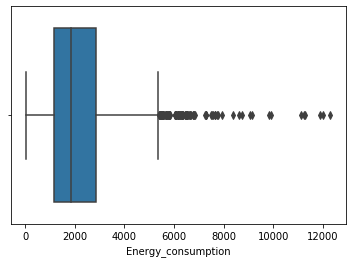

In [212]:
sns.boxplot(train[target])

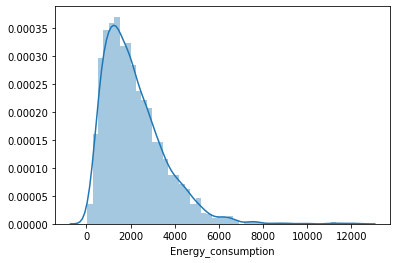

In [213]:
sns.distplot(train[target])

In [214]:
from tqdm import tqdm_notebook

A Jupyter Widget

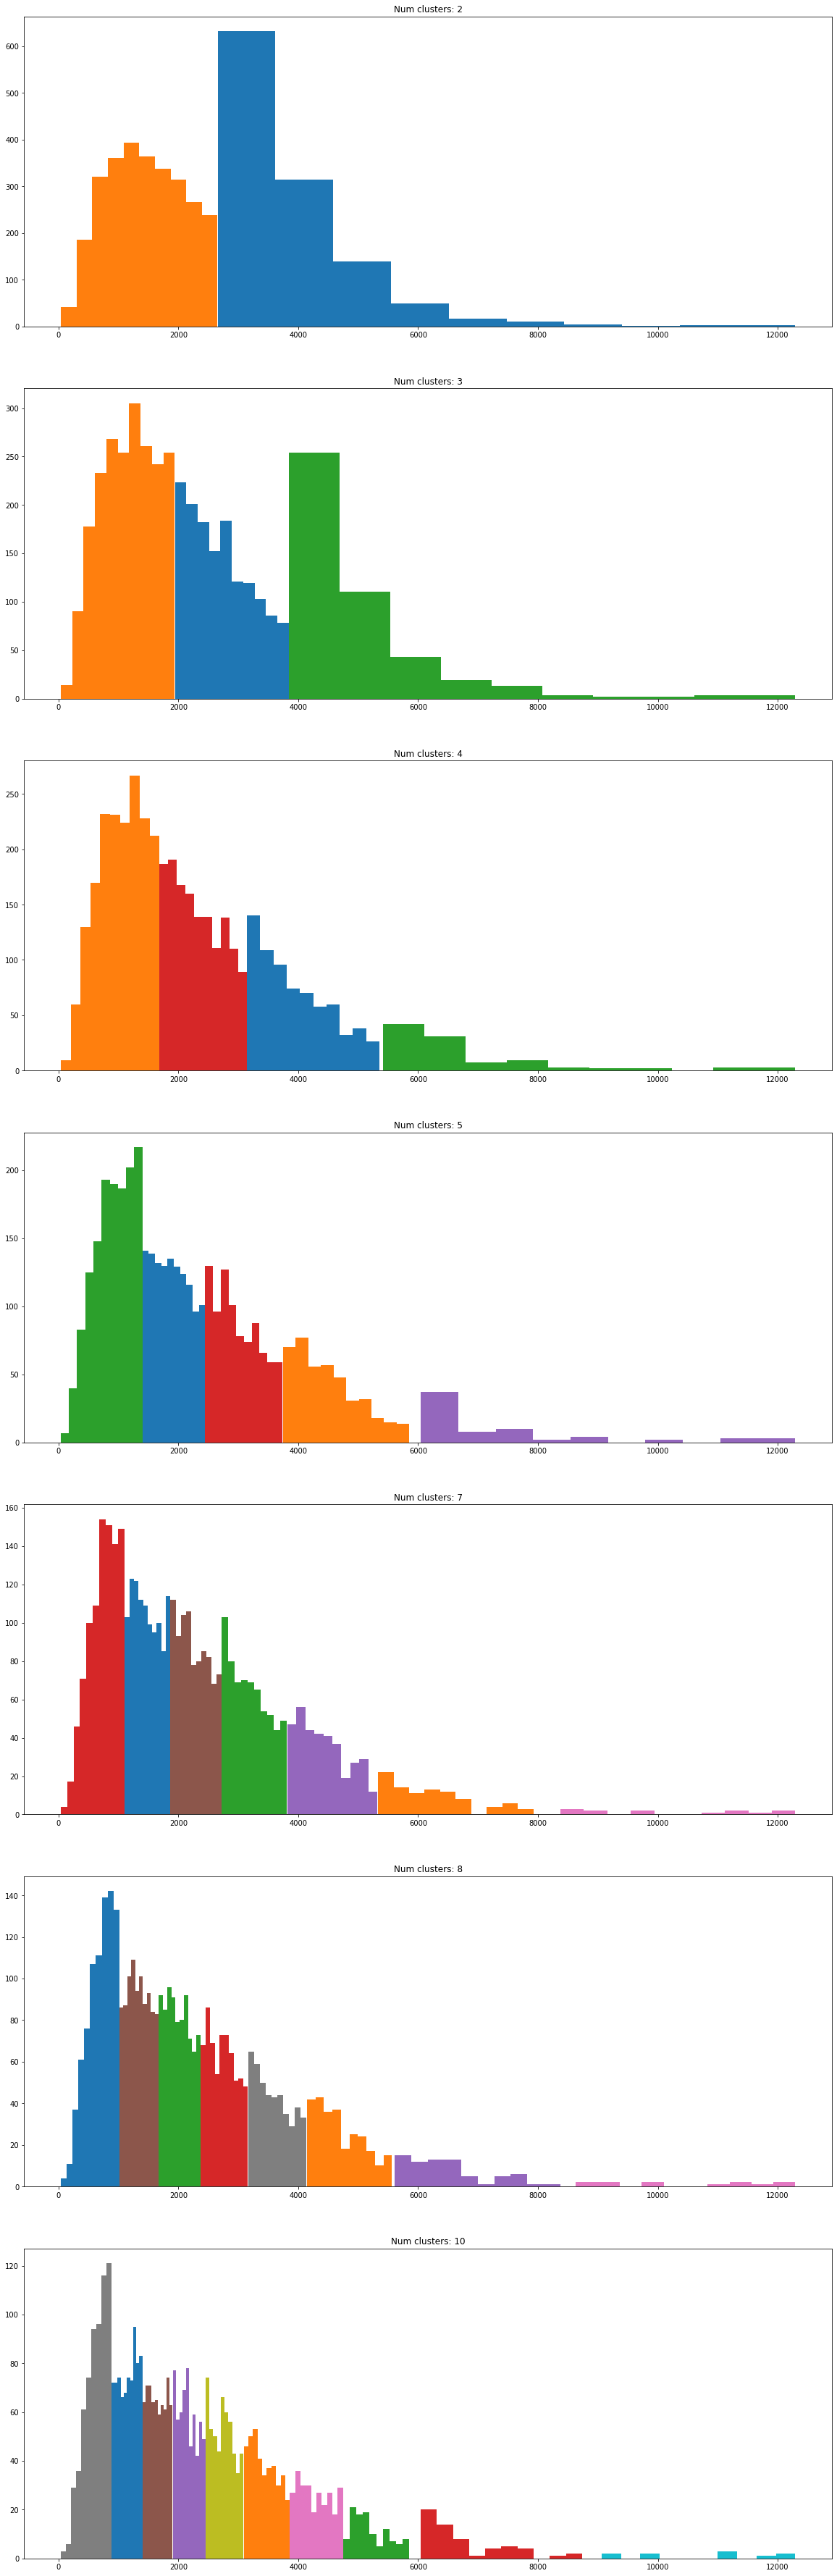

In [220]:
n_clusters=[2, 3, 4, 5, 7, 8, 10]
target_values = train[target].values.reshape(-1,1)
plt.subplots(figsize=(FIGSIZE))
counter=1
for n in tqdm_notebook(n_clusters, total=len(n_clusters)):
    kmeans = KMeans(n_clusters=n)
    predicted_target = kmeans.fit(target_values).predict(target_values)
    plt.subplot(len(n_clusters), 1, counter)
    plt.title('Num clusters: {}'.format(n))
    un_pred = np.unique(predicted_target)
    for unique in un_pred:
        target_plot = target_values[predicted_target == unique]
        plt.hist(target_plot, label="{}".format(unique))
    counter += 1
plt.subplots_adjust(top=5)

In [221]:
kmeans = KMeans(n_clusters=4)
predicted_target = kmeans.fit(target_values).predict(target_values)
train['clusters'] = predicted_target

In [223]:
def prediction_by_folds(train_X, train_y, test_X, cv, model):
    predictions = np.zeros((test_X.shape[0], 1))
    for (tr_ind, val_ind) in cv.split(train_X):
        X_train_fold = train_X.iloc[tr_ind]
        y_train_fold = train_y.iloc[tr_ind]
        
        model_fold = clone(model)
        y_pred = model_fold.fit(X_train_fold, y_train_fold).predict(test_X).reshape(-1,1)
        predictions += y_pred
        
    return predictions/cv.n_splits

In [255]:
def prediction_cluster_folds(train_X, train_y, test_X,model,
                            n_clusters=4,n_splits=5):
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)
    predicted_target = kmeans.fit(train_y).predict(train_y)
    
    predictions_holdout = np.zeros((test_X.shape[0], 1))

    scores = []
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)

    for (tr_ind, val_ind) in skf.split(train_X, predicted_target):
        X_train_fold = train_X[tr_ind]
        y_train_fold = train_y[tr_ind]

        X_valid_fold = train_X[val_ind]
        y_valid_fold = train_y[val_ind]

        model_fold = clone(model)
        y_pred = model_fold.fit(X_train_fold, y_train_fold).predict(X_valid_fold).reshape(-1,1)
        scores.append(mean_squared_error(y_valid_fold, y_pred))

        y_pred_holdout = model_fold.predict(test_X).reshape(-1,1)
        predictions_holdout += y_pred_holdout
    
    predictions_holdout /= skf.n_splits
    return predictions_holdout, scores

In [243]:
res, score = prediction_cluster_folds(X_train.values, y_train, X_valid.values, pipe_lasso)

In [247]:
scaler = StandardScaler()
lasso = Lasso(alpha=5, random_state=SEED)
pipe_lasso = Pipeline([('scaler', scaler),
                       ('lr', lasso)])

In [258]:
n_splits = [3, 4, 5, 6, 7, 8, 9, 10]

n_splits_scores = []
for n_split in tqdm_notebook(n_splits, total=len(n_splits)):
    _, score = prediction_cluster_folds(X_train.values, y_train, X_valid.values, pipe_lasso,
                                       n_splits=n_split)
    n_splits_scores.append(score)

A Jupyter Widget

In [262]:
list(zip(n_splits, map(lambda x: (np.mean(x), np.std(x)), n_splits_scores)))

[(3, (773258.9413229808, 38791.84890341773)),
 (4, (762443.9986280887, 96895.11856476527)),
 (5, (754193.7345266572, 59340.768968570854)),
 (6, (747471.4452160773, 111862.6403616605)),
 (7, (747306.3653326664, 77502.77132435674)),
 (8, (743597.1365164719, 99369.73013875258)),
 (9, (746835.9175816558, 101025.77396539663)),
 (10, (743027.8487600452, 116051.62312058761))]

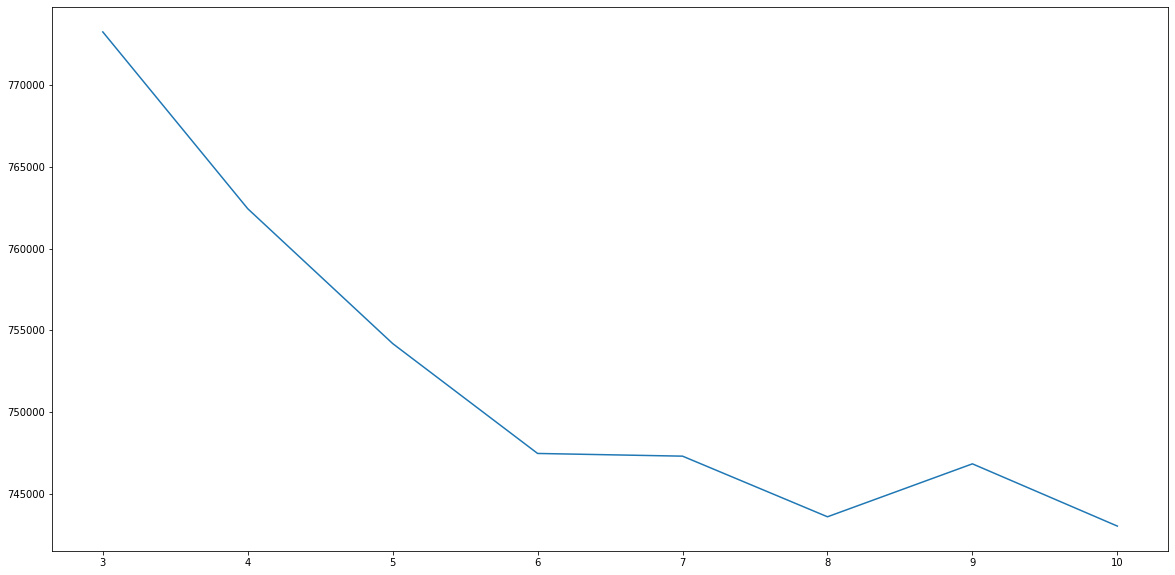

In [259]:
plt.subplots(figsize=FIGSIZE)
plt.plot(n_splits, list(map(np.mean, n_splits_scores)));

In [263]:
n_clusters = [2, 3, 4, 5, 6, 7, 8]
n_clusters_scores = []
for n_cl in tqdm_notebook(n_clusters, total=len(n_clusters)):
    _, score = prediction_cluster_folds(X_train.values, y_train, X_valid.values, pipe_lasso,
                                       n_splits=7, n_clusters=n_cl)
    n_clusters_scores.append(score)

A Jupyter Widget

In [265]:
n_clusters = 4
n_splits = 7

In [296]:
pred, score = prediction_cluster_folds(X_train.values, y_train, X_valid.values, pipe_lasso,
                                       n_splits=n_splits, n_clusters=n_clusters)

### Submission clustered validation

In [276]:
scaler = StandardScaler()
lasso = Lasso(alpha=5, random_state=SEED)
pipe_lasso = Pipeline([('scaler', scaler),
                       ('lr', lasso)])

y_pred,scores = prediction_cluster_folds(X_train_full.values, y.values.reshape(-1,1), 
                                 X_test.values,
                                 model=pipe_lasso,
                                 n_clusters=n_clusters,
                                 n_splits=n_splits)

In [278]:
submission = pd.DataFrame(test_initial['Id'], columns=['Id'])
submission[target] = y_pred
submission.to_csv('../data/submissions/baseline_v2_lasso_alpha5_cluster_folds.csv', index=False)

### XGBoost

In [331]:
train_initial = pd.read_csv('../data/train.csv')
test_initial = pd.read_csv('../data/test.csv')

X_test = test_initial.drop('Id', axis=1)

X = train_initial.drop(['Id', target], axis=1)
y = train_initial[target].values.reshape(-1,1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25,
                                                     random_state=SEED,
                                                     shuffle=True)

In [332]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3000, 285), (1000, 285), (3000, 1), (1000, 1))

In [333]:
# 4,257 - LabelEncoder
# 258 - OneHot

In [334]:
catcols = X_train.select_dtypes(include='object').columns
onehot = OneHotEncoder()

train_trans = pd.DataFrame(onehot.fit_transform(X_train[catcols]).toarray())
test_trans = pd.DataFrame(onehot.transform(X_valid[catcols]).toarray())

X_train = pd.concat([X_train.drop(catcols, axis=1).reset_index(drop=True), 
                     train_trans], axis=1)

X_valid = pd.concat([X_valid.drop(catcols, axis=1).reset_index(drop=True), 
                    test_trans], axis=1)


catcols = X.select_dtypes(include='object').columns
onehot = OneHotEncoder() 

train_trans = pd.DataFrame(onehot.fit_transform(X[catcols]).toarray())
X_train_full = pd.concat([X.drop(catcols, axis=1).reset_index(drop=True),
                    train_trans], axis=1)

test_trans = pd.DataFrame(onehot.transform(X_test[catcols]).toarray())
X_test = pd.concat([X_test.drop(catcols, axis=1).reset_index(drop=True), 
                    test_trans], axis=1)

In [327]:
xgb = XGBRegressor(random_state=SEED, n_jobs=-1)
y_pred,scores = prediction_cluster_folds(X_train.values, y_train, 
                                 X_valid.values,
                                 model=xgb,
                                 n_clusters=n_clusters,
                                 n_splits=n_splits)

In [337]:
np.mean(scores), np.std(scores), mean_squared_error(y_valid, y_pred)

(716218.6550778305, 89808.3724766475, 637866.1233504438)

In [339]:
xgb = XGBRegressor(random_state=SEED, n_jobs=-1)
y_pred,scores = prediction_cluster_folds(X_train_full.values, y, 
                                 X_test.values,
                                 model=xgb,
                                 n_clusters=n_clusters,
                                 n_splits=n_splits)

In [341]:
np.mean(scores)

698149.7450907946

In [353]:
zoo_models = [
    ('CatBoost', CatBoostRegressor(iterations=100,
                                   thread_count=4, 
                                   random_state=SEED, 
                                   verbose=False)),
    ('XGBoost', XGBRegressor(random_state=SEED, n_jobs=-1)),
    ('RandomForest', RandomForestRegressor(n_estimators=100, 
                                           random_state=SEED, 
                                           n_jobs=-1)),
    ('ExtraTrees', ExtraTreesRegressor(n_estimators=100,
                                       random_state=SEED, 
                                       n_jobs=-1)),
    ('LGBM', LGBMRegressor(n_estimators=100,
                           n_jobs=-1,
                           random_state=SEED))
]

In [354]:
model_scores = {}
for name, model in tqdm_notebook(zoo_models, total=(len(zoo_models))):
    # score on train + validation voting
    # score on full + prediction test
    y_pred_val, scores_train = prediction_cluster_folds(X_train.values, y_train,
                                                       X_valid.values,
                                                       model=model,
                                                       n_clusters=n_clusters,
                                                       n_splits=n_splits)
    y_pred_test, scores_full = prediction_cluster_folds(X_train_full.values, y,
                                                       X_test.values,
                                                       model=model,
                                                       n_clusters=n_clusters,
                                                       n_splits=n_splits)
    
    model_scores[name] = {
        'pred_valid' : y_pred_val,
        'pred_test' : y_pred_test,
        'scores_train' : np.array(scores_train),
        'scores_full' : np.array(scores_full),
        'mae_valid' : mean_squared_error(y_valid, y_pred_val)
    }

A Jupyter Widget

In [356]:
ens_pred_val = np.zeros((X_valid.shape[0], 1))
ens_pred_test = np.zeros((X_test.shape[0], 1))
for name, info in model_scores.items():
    print("Model: {}\nMean train: {}\nStd train: {}\nMean full: {}\nStd full: {}\nValidation: {}".\
              format(name, info['scores_train'].mean(), info['scores_train'].std(),
                    info['scores_full'].mean(), info['scores_full'].std(),
                    info['mae_valid']))
    ens_pred_val += info['pred_valid']
    ens_pred_test += info['pred_test']
    print("\n\n")
ens_pred_val /= len(model_scores)
ens_pred_test /= len(model_scores)

print("Ensemble MAE: {}".format(mean_squared_error(y_valid, ens_pred_val)))

Model: CatBoost
Mean train: 929858.4751630237
Std train: 127708.80448678655
Mean full: 881692.2310086583
Std full: 55752.54657923444
Validation: 779426.7177991588



Model: XGBoost
Mean train: 716218.6550778305
Std train: 89808.3724766475
Mean full: 698149.7450907946
Std full: 45240.41999339095
Validation: 637866.1233504438



Model: RandomForest
Mean train: 791883.7644633049
Std train: 92112.8389930899
Mean full: 775546.8544052849
Std full: 48400.52202883365
Validation: 670876.8073864996



Model: ExtraTrees
Mean train: 801975.1820428595
Std train: 98073.30715894233
Mean full: 769823.1710923103
Std full: 53770.62472490684
Validation: 688629.5065191862



Model: LGBM
Mean train: 722804.0673068006
Std train: 77914.65030905064
Mean full: 693704.8302096423
Std full: 45239.792479667754
Validation: 604495.6481080331



Ensemble MAE: 635686.745322792


In [358]:
zoo_models = [
    ('XGBoost', XGBRegressor(n_estimators=100, 
                             random_state=SEED, 
                             n_jobs=-1)),
    ('LGBM', LGBMRegressor(n_estimators=100,
                           n_jobs=-1,
                           random_state=SEED))
]

In [359]:
model_scores = {}
for name, model in tqdm_notebook(zoo_models, total=(len(zoo_models))):
    # score on train + validation voting
    # score on full + prediction test
    y_pred_val, scores_train = prediction_cluster_folds(X_train.values, y_train,
                                                       X_valid.values,
                                                       model=model,
                                                       n_clusters=n_clusters,
                                                       n_splits=n_splits)
    y_pred_test, scores_full = prediction_cluster_folds(X_train_full.values, y,
                                                       X_test.values,
                                                       model=model,
                                                       n_clusters=n_clusters,
                                                       n_splits=n_splits)
    
    model_scores[name] = {
        'pred_valid' : y_pred_val,
        'pred_test' : y_pred_test,
        'scores_train' : np.array(scores_train),
        'scores_full' : np.array(scores_full),
        'mae_valid' : mean_squared_error(y_valid, y_pred_val)
    }

A Jupyter Widget

In [360]:
ens_pred_val = np.zeros((X_valid.shape[0], 1))
ens_pred_test = np.zeros((X_test.shape[0], 1))
for name, info in model_scores.items():
    print("Model: {}\nMean train: {}\nStd train: {}\nMean full: {}\nStd full: {}\nValidation: {}".\
              format(name, info['scores_train'].mean(), info['scores_train'].std(),
                    info['scores_full'].mean(), info['scores_full'].std(),
                    info['mae_valid']))
    ens_pred_val += info['pred_valid']
    ens_pred_test += info['pred_test']
    print("\n\n")
ens_pred_val /= len(model_scores)
ens_pred_test /= len(model_scores)

print("Ensemble MAE: {}".format(mean_squared_error(y_valid, ens_pred_val)))

Model: XGBoost
Mean train: 716218.6550778305
Std train: 89808.3724766475
Mean full: 698149.7450907946
Std full: 45240.41999339095
Validation: 637866.1233504438



Model: LGBM
Mean train: 722804.0673068006
Std train: 77914.65030905064
Mean full: 693704.8302096423
Std full: 45239.792479667754
Validation: 604495.6481080331



Ensemble MAE: 611213.3019625137


In [369]:
model_scores['XGBoost']['scores_train']

array([753768.34672743, 629008.29060344, 731138.69309687, 708485.0012532 ,
       762030.14676007, 864644.19265361, 564455.91445019])

In [370]:
model_scores['LGBM']['scores_train']

array([754246.51854658, 674997.56979072, 722618.38589954, 730882.10564584,
       819251.63231499, 792797.40174887, 564834.85720107])

In [365]:
lgbm = LGBMRegressor(n_estimators=100,
                     n_jobs=-1, 
                     random_state=SEED)

In [366]:
y_pred_test, scores_full = prediction_cluster_folds(X_train_full.values, y,
                                                       X_test.values,
                                                       model=lgbm,
                                                       n_clusters=n_clusters,
                                                       n_splits=n_splits)

In [367]:
np.mean(scores_full)

693704.8302096423

In [368]:
submission = pd.DataFrame(test_initial['Id'], columns=['Id'])
submission[target] = y_pred
submission.to_csv('../data/submissions/lgb_oob_cluster_folds.csv', index=False)

In [351]:
from sklearn.base import clone

def prediction_cluster_folds(train_X, train_y, test_X,model,
                            n_clusters=4,n_splits=5):
    """
        train_X -- ndarray
        train_y -- ndarray with (n, 1) shape
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)
    predicted_target = kmeans.fit(train_y).predict(train_y)
    
    predictions_holdout = np.zeros((test_X.shape[0], 1))

    scores = []
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)

    for (tr_ind, val_ind) in skf.split(train_X, predicted_target):
        X_train_fold = train_X[tr_ind]
        y_train_fold = np.squeeze(train_y[tr_ind])

        X_valid_fold = train_X[val_ind]
        y_valid_fold = np.squeeze(train_y[val_ind])

        model_fold = clone(model)
        y_pred = model_fold.fit(X_train_fold, y_train_fold).predict(X_valid_fold).reshape(-1,1)
        scores.append(mean_squared_error(y_valid_fold, y_pred))

        y_pred_holdout = model_fold.predict(test_X).reshape(-1,1)
        predictions_holdout += y_pred_holdout
    
    predictions_holdout /= skf.n_splits
    return predictions_holdout, scores

In [371]:
alpha=.5
sum([(1-alpha)*1, (1-alpha)*1, (1-alpha)*1, (1-alpha)*0.5, alpha*0.5, alpha*1, alpha*1.5, alpha*0.5])

3.5

### Fold ensembling

In [541]:
def prediction_cluster_folds_ensemble(train_X, train_y, test_X, models, 
                                      n_clusters=4,n_splits=5):
    """
        train_X -- ndarray
        train_y -- ndarray with (n, 1) shape
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)
    predicted_target = kmeans.fit(train_y).predict(train_y)
    
    predictions_holdout = np.zeros((test_X.shape[0], 1))

    scores = []
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)

    for (tr_ind, val_ind) in skf.split(train_X, predicted_target):
        X_train_fold = train_X[tr_ind]
        y_train_fold = np.squeeze(train_y[tr_ind])

        X_valid_fold = train_X[val_ind]
        y_valid_fold = np.squeeze(train_y[val_ind])
        
        # ensembling weighting average
        pred_test_inline = np.zeros((test_X.shape[0], 1))
        pred_val_inline = np.zeros((X_valid_fold.shape[0], 1))
        weight_sum = 0
        for (alpha, model) in models:
            model_fold = clone(model)
            y_pred = model_fold.fit(X_train_fold, y_train_fold).predict(X_valid_fold).reshape(-1,1)
            pred_val_inline += alpha * y_pred
            
            y_pred = model_fold.predict(test_X).reshape(-1,1)
            pred_test_inline += alpha * y_pred
            weight_sum += alpha
        
        pred_test_inline /= weight_sum
        pred_val_inline /= weight_sum
        ####
        
        scores.append(mean_squared_error(y_valid_fold, pred_val_inline))
        predictions_holdout += pred_test_inline
    
    predictions_holdout /= skf.n_splits
    return predictions_holdout, scores

In [437]:
alpha=0.5
zoo_models = [ (alpha, XGBRegressor(n_estimators=100, 
                             random_state=SEED, 
                             n_jobs=-1)),
              (alpha, LGBMRegressor(n_estimators=100,
                           n_jobs=-1,
                           random_state=SEED))
]

In [438]:
y_pred, scores = prediction_cluster_folds_ensemble(X_train_full.values, y, 
                                                   X_test.values,  
                                                   zoo_models, 
                                                   n_clusters=n_clusters, 
                                                   n_splits=n_splits)

In [401]:
y_pred

array([[1929.54623243],
       [1270.82565492],
       [1034.32335008],
       ...,
       [2975.41445911],
       [3056.62688327],
       [1401.17709006]])

In [393]:
scores

[625346.0075192594,
 619842.5695412367,
 677113.1725212014,
 713077.7088758622,
 702744.0178411735,
 747589.3518239736,
 642595.9030634712]

In [439]:
np.mean(scores)

675472.6758837396

In [395]:
np.std(scores)

44800.58127885088

In [402]:
submission = pd.DataFrame(test_initial['Id'], columns=['Id'])
submission[target] = y_pred
submission.to_csv('../data/submissions/lgb_xgb_oob_ensemble_cluster_folds.csv', index=False)

### Adding other models to model zoo

In [403]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

In [501]:
scaler= StandardScaler()
lr = SGDRegressor(loss='squared_loss', random_state=SEED, penalty='elasticnet',
                 alpha=5, l1_ratio=.75)
lasso = Lasso(alpha=5, random_state=SEED)
pipe_sgd = Pipeline([('scaler', scaler),
                       ('lr', lr)])

pipe_lasso = Pipeline([('scaler', scaler),
                       ('lr', lasso)])

In [459]:
y_pred, scores = prediction_cluster_folds(X_train.values, y_train, X_valid.values,
                                          pipe_lasso,
                                         n_clusters=n_clusters, n_splits=n_splits)

In [460]:
np.mean(scores)

765127.2157820935

In [453]:
scores

[795034.401183603,
 699441.898191981,
 739502.0682594902,
 760750.0294927062,
 857297.1953839398,
 785655.1573649837,
 593463.8074519605]

In [467]:
from sklearn.feature_selection import SelectFromModel

In [468]:
xgb = XGBRegressor(random_state=SEED, n_jobs=-1)
xgb.fit(X_train_full, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=17,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [475]:
feat_imp = list(zip(X_train_full.columns, xgb.feature_importances_))
feat_imp = sorted(feat_imp, key=lambda x: x[1], reverse=True)

In [502]:
# select from model
xgb = XGBRegressor(random_state=SEED, n_jobs=-1)
lgb = LGBMRegressor(random_state=SEED, n_jobs=-1)
lbg_xgb = Pipeline([('thresholding', SelectFromModel(xgb, threshold=0.001)),
                   ('lbg', lgb)])

In [503]:
y_pred, scores = prediction_cluster_folds(X_train_full.values, y, X_test.values,
                                          lbg_xgb,
                                         n_clusters=n_clusters, n_splits=n_splits)

ValueError: The underlying estimator Pipeline has no `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to SelectFromModel or call fit before calling transform.

In [499]:
scores

[678552.4237016721,
 632358.7996325137,
 663717.566859581,
 690697.7417200186,
 730495.3908282985,
 762235.6630082164,
 675359.9843554054]

In [504]:
np.mean(scores), np.std(scores)

(690488.224300815, 40027.37870877716)

In [505]:
from sklearn.decomposition import TruncatedSVD

In [514]:
# svd
n_components = 125
lgb_svd = Pipeline([('pca', TruncatedSVD(n_components=n_components, random_state=SEED)),
                   ('lgb', LGBMRegressor(random_state=SEED, n_jobs=-1))])

In [515]:
y_pred, scores = prediction_cluster_folds(X_train.values, y_train, X_valid.values,
                                          lgb_svd,
                                         n_clusters=n_clusters, n_splits=n_splits)

In [516]:
scores

[1002462.6617691228,
 919870.7383011793,
 1014781.6468730615,
 923379.8154887427,
 1139536.720011712,
 926164.4959365788,
 911029.2126179399]

In [517]:
np.mean(scores)

976746.4701426197

In [518]:
# trying with lasso

In [542]:
scaler= StandardScaler()
lasso = Lasso(alpha=10, random_state=SEED, max_iter=1000)
pipe_lasso = Pipeline([('scaler', scaler),
                       ('lr', lasso)])

alpha=0.5
zoo_models = [ (.7, XGBRegressor(n_estimators=100, 
                             random_state=SEED, 
                             n_jobs=-1)),
              (1, LGBMRegressor(n_estimators=100,
                           n_jobs=-1,
                           random_state=SEED)),
              (.5, pipe_lasso)
]

In [543]:
y_pred, scores = prediction_cluster_folds_ensemble(X_train_full.values, y, 
                                                   X_test.values,  
                                                   zoo_models, 
                                                   n_clusters=n_clusters, 
                                                   n_splits=n_splits)

In [544]:
np.mean(scores), np.std(scores)

(664285.1684316786, 44823.61363952092)

In [533]:
# did not improve the result
submission = pd.DataFrame(test_initial['Id'], columns=['Id'])
submission[target] = y_pred
submission.to_csv('../data/submissions/lgb_xgb_oob_lasso5_ensemble_cluster_folds.csv', index=False)

### Combine some overcomplex stuff

In [545]:
cbt = .5
ss = .5
nest_lgb=1
nest_xgb=1
alphas = [.3, .4, .5, .7, .1, .2, .3, .5]
zoo_models = [

    LGBMRegressor(num_leaves=2, 
                  learning_rate=0.07, 
                  n_estimators=int(500*nest_lgb), 
                  colsample_bytree=cbt, 
                  subsample=ss,n_jobs=-1, random_state=SEED),
    LGBMRegressor(num_leaves=3, 
                  learning_rate=0.07, 
                  n_estimators=int(400*nest_lgb),
                  colsample_bytree=cbt, 
                  subsample=ss,
                  n_jobs=-1, random_state=SEED+1),
    LGBMRegressor(num_leaves=4, 
                  learning_rate=0.07, 
                  n_estimators=int(300*nest_lgb),
                  colsample_bytree=cbt, 
                  subsample=ss,
                  n_jobs=-1, random_state=SEED+2),
    LGBMRegressor(num_leaves=5, 
                  learning_rate=0.07, 
                  n_estimators=int(200*nest_lgb),
                  colsample_bytree=cbt, 
                  subsample=ss,
                  n_jobs=-1, random_state=SEED+3),
    
    
    XGBRegressor(max_depth=1,
                 learning_rate=0.1,
                 n_estimators=int(400*nest_xgb),
                 subsample=ss,
                 colsample_bytree=cbt,
                 n_jobs=-1,
                 random_state=0+SEED),
    XGBRegressor(max_depth=2,
                 learning_rate=0.1,
                 n_estimators=int(300*nest_xgb),
                 subsample=ss,
                 colsample_bytree=cbt,
                 n_jobs=-1,
                 random_state=1+SEED),
    XGBRegressor(max_depth=3,
                 learning_rate=0.1,
                 n_estimators=int(200*nest_xgb),
                 subsample=ss,
                 colsample_bytree=cbt,
                 n_jobs=-1,
                 random_state=2+SEED),
    XGBRegressor(max_depth=4,
                 learning_rate=0.1,
                 n_estimators=int(100*nest_xgb),
                 subsample=ss,
                 colsample_bytree=cbt,
                 n_jobs=-1,
                 random_state=3+SEED)
]

In [546]:
zoo_models = list(zip(alphas, zoo_models))

In [551]:
len(zoo_models)

8

In [548]:
%%time
y_pred, scores = prediction_cluster_folds_ensemble(X_train_full.values, y, 
                                                   X_test.values,  
                                                   zoo_models, 
                                                   n_clusters=n_clusters,
                                                   n_splits=n_splits)

CPU times: user 2min 33s, sys: 2.2 s, total: 2min 35s
Wall time: 2min 6s


In [549]:
np.mean(scores), np.std(scores)

(671611.1942929082, 50291.65300299337)

In [550]:
submission = pd.DataFrame(test_initial['Id'], columns=['Id'])
submission[target] = y_pred
submission.to_csv('../data/submissions/lgb_xgb_big_ensemble_cluster_folds.csv', index=False)